In [71]:
pip install SQLAlchemy==1.4.46


Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.io
from utils import *
import hvplot.pandas
import panel as pn
#from google.colab import drive

#from google.colab import drive
#drive.mount('/content/drive')

# <font color=33FFF9>**Introduction to Booklet**</font>

<h3 style="font-family:Georgia;"> Introduction</h3>
<p> This documentation is for my thesis project on aircraft design and analysis. This document serves as a comprehensive repository of all the information, work, code, and notes accumulated throughout the course of my research.</p>

<h3 style="font-family:Georgia;"> Purpose</h3>
Within this documentation, you will discover the following key components:

<ul>
    <li><strong>Research Objectives:</strong> Clearly defined goals and objectives guiding the research project.</li>
    <li><strong>Literature Review:</strong> A comprehensive summary of key findings from relevant literature and research in the field of aircraft design and analysis.</li>
    <li><strong>Data Sources:</strong> Documentation of the sources of data utilized, whether obtained from publicly available datasets, industry reports, or proprietary sources.</li>
    <li><strong>Model Development:</strong> Detailed explanation of the development and implementation of any machine learning models or algorithms used in the research, including parameter tuning and validation techniques.</li>
    <li><strong>Results and Analysis:</strong> Presentation of the findings and analysis, including insights or trends discovered from the data.</li>
    <li><strong>References:</strong> A comprehensive list of references cited throughout the documentation, following a consistent citation style.</li>
    <li><strong>Important Notes:</strong> Insights into the rationale behind specific decisions made during the research process and any noteworthy considerations.</li>
</ul>

<h3 style="font-family:Georgia;"> Color Coding</h3>
<ul>
<li style="color: #33FFF9;"><strong>Title:</strong> #33FFF9</li>
<li style="color: #CE33FF;"><strong>Parameters Section:</strong> #CE33FF</li>
<li style="color: #FF338D;"><strong>Subsections:</strong> #FF338D</li>
<li style="color: #FF5533;"><strong>Important Notes:</strong> #FF5533</li>
<li style="color: #374DC8;"><strong>Parameter Name:</strong> #374DC8</li>
<li style="color: #44C837;"><strong>Next Steps:</strong> #44C837</li>
<li style="color: #C837A0;"><strong>Explanation:</strong> #C837A0</li>
</ul>

# <font color=33FFF9>**Standard Units In Aviation**</font>
<p> The standard SI Units are taken from the following link: <a href=https://en.wikipedia.org/wiki/International_Civil_Aviation_Organization">Civil Aviation SI Units</a>

<table style="width:100%">
  <tr>
    <th>Parameter</th>
    <th>Unit</th>
  </tr>
  <tr>
    <td>Speed</td>
    <td>km/h</td>
  </tr>
  <tr>
    <td>Distance</td>
    <td>km</td>
  </tr>
  <tr>
    <td>Altitude</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Weight</td>
    <td>kg</td>
  </tr>
  <tr>
    <td>Fuel Capacity	</td>
    <td>Liters (L)</td>
  </tr>
  <tr>
    <td>Fuel Weight	</td>
    <td>kg</td>
  </tr>
  <tr>
    <td>Thrust</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Temperature</td>
    <td>Celsius (°C)</td>
  </tr>
  <tr>
    <td>Acceleration</td>
    <td>Meters per second squared (m/s²)</td>
  </tr>
  <tr>
    <td>Force</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Density</td>
    <td>Kilograms per cubic meter (kg/m³)</td>
  </tr>
  <tr>
    <td>Length</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Wing Span</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Thrust/Shaft Power</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Wing Loading</td>
    <td>N/m²</td>
  </tr>
  <tr>
    <td>Tail Loading</td>
    <td>N/m²</td>
  </tr>
  <tr>
    <td>Rate of Climb (ROC)</td>
    <td>m/s</td>
  </tr>
  <tr>
    <td>Fuselage Length</td>
    <td>meters</td>
  </tr>
  </tr>
</table>



# <font color=33FFF9>**Dataset: Aircraft Performance (Aircraft Bluebook)**</font>

<p> The dataset is taken from the following link: <a href="https://www.kaggle.com/datasets/heitornunes/aircraft-performance-dataset-aircraft-bluebook/versions/11?resource=download&select=Airplane_Cleaned.csv">Aircraft Bluebook</a>



This dataset contains 861 airplanes and 102 helicopters and their characteristics, such as Max Speed, Cruise Speed, Range, etc. Data wrangling is recommend for data analysis, since there's a lot of missing values, different data formats and units for the same features.



## <font style="color: #CE33FF;"> Features Updated: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> Airplane's name.</li>
    <li><strong><span style="color: #374DC8;">Company:</span></strong> Company's name..</li>
    <li><strong><span style="color: #374DC8;">Engine Type:</span></strong> Engine type used in the airplane..</li>
    <li><strong><span style="color: #374DC8;">Multi Engine:</span></strong> Multi Enginer or not.</li>
    <li><strong><span style="color: #374DC8;">TP Models:</span></strong> Third Party Modifications.</li>
    <li><strong><span style="color: #374DC8;">*THR (Thurst Power):</span></strong> Engine's ability to produce thrust. Only applicable to jet engines. Units: HP or lbf</li>
    <li><strong><span style="color: #374DC8;">SHP (Shaft Power):</span></strong> Engine's ability to produce shaft power. Only applicable to piston engines or turboprop engines. Units: HP or lbf</li>
    <li><strong><span style="color: #374DC8;">Length:</span></strong> Airplane's length. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">Height:</span></strong> Airplane's height. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">Wing Span:</span></strong> Airplane's wingspan. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">FW (Fuel Weight):</span></strong> Indicates the weight of the fuel in pounds. In aviation, fuel is often measured and stored in gallons, particularly in smaller aircraft. However, fuel consumption and performance calculations are typically done based on weight rather than volume, as weight directly affects the aircraft's performance</li>
    <li><strong><span style="color: #374DC8;">MEW (Manufacturer's Empty Weight):</span></strong> Empty weight lbs. It's the weight of the aircraft "as built" and includes the weight of the structure, power plant, furnishings, installations, systems, and other equipments.</li>
    <li><strong><span style="color: #374DC8;">AUW:</span></strong> All-Up Weight. Total aircraft weight at any moment during the flight.</li>
    <li><strong><span style="color: #374DC8;">Vmax (Max speed Knots):</span></strong> Airplane's maximum speed. Units: Knot or Mach.</li>
    <li><strong><span style="color: #374DC8;">Vcruise (Rcmnd cruise Knots):</span></strong> Airplane's High cruise speed. Units: Knot.</li>
    <li><strong><span style="color: #374DC8;">Vstall (Stall Knots dirty):</span></strong> Airplane's stall speed on "dirty" configuration (flaps out, gear down, etc.). Units: Knot.</li>
    <li><strong><span style="color: #374DC8;">Hmax (All Engine Service Ceiling):</span></strong>The All Engine Service Ceiling indicates the highest altitude at which the aircraft can maintain level flight with all engines operating at maximum power. It accounts for the aircraft's performance capabilities under normal operating conditions.</li>
    <li><strong><span style="color: #374DC8;">Hmax (One) (Engine Out Service Ceiling):</span></strong> The Engine Out Service Ceiling indicates the highest altitude at which the aircraft can maintain level flight with one engine inoperative. It accounts for the reduced performance and climb capability resulting from the loss of an engine.</li>
    <li><strong><span style="color: #374DC8;">ROC (All eng rate of climb):</span></strong> Airplane's rate of climb with all engines working. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">ROC(One) (Eng out rate of climb):</span></strong> Airplane's rate of climb with one engine working. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">Vlo (Takeoff over 50ft):</span></strong> Airplane's climb speed during normal take-off for 50 ft obstacle. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">Slo (Takeoff ground run):</span></strong> Airplane's takeoff ground run. Units: ft.</li>
    <li><strong><span style="color: #374DC8;">VI (Landing over 50ft):</span></strong></li>
    <li><strong><span style="color: #374DC8;">SI (Landing ground roll):</span></strong> </li>
    <li><strong><span style="color: #374DC8;">Range:</span></strong> Airplane's range. Units: N.m. (Nautical miles).</li>
</ul>


In [74]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [32]:
aircraft_performance_dataset = pd.read_csv('Datasets/Aircraft Performance (Aircraft Bluebook)/Airplane_Cleaned.csv')
aircraft_performance_dataset

,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Aeronca,Piston,NaN,False,NaN,145.0,25.250000,10.250000,37.416667,...,46.0,13000.0,NaN,450.0,NaN,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,False,NaN,85.0,20.583333,8.750000,36.083333,...,44.0,12300.0,NaN,600.0,NaN,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,False,NaN,90.0,21.416667,8.583333,35.000000,...,37.0,16000.0,NaN,650.0,NaN,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Aeronca,Piston,NaN,False,NaN,85.0,21.416667,8.583333,35.000000,...,37.0,13000.0,NaN,620.0,NaN,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Aeronca,Piston,NaN,False,NaN,65.0,21.416667,8.750000,35.000000,...,33.0,12500.0,NaN,370.0,NaN,632.0,NaN,885.0,NaN,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,True,False,NaN,260.0,35.083333,14.416667,49.416667,...,54.0,22500.0,7850.0,1400.0,320.0,1210.0,970.0,1150.0,865.0,957.0
856,500,Twin Commander A/C,Piston,True,False,NaN,250.0,35.083333,14.416667,49.000000,...,55.0,22500.0,7150.0,1400.0,290.0,1250.0,1000.0,1350.0,950.0,957.0
857,520,Twin Commander A/C,Piston,True,False,NaN,260.0,35.416667,14.416667,44.083333,...,52.0,24000.0,8500.0,1700.0,400.0,1100.0,950.0,1050.0,900.0,1000.0
858,2180,Varga,Piston,NaN,False,NaN,180.0,21.166667,7.000000,30.000000,...,45.0,22000.0,NaN,1310.0,NaN,NaN,NaN,NaN,NaN,365.0


In [33]:
aircraft_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         860 non-null    object 
 1   Company       860 non-null    object 
 2   Engine Type   860 non-null    object 
 3   Multi Engine  381 non-null    object 
 4   TP mods       860 non-null    bool   
 5   THR           156 non-null    float64
 6   SHP           704 non-null    float64
 7   Length        846 non-null    float64
 8   Height        843 non-null    float64
 9   Wing Span     856 non-null    float64
 10  FW            855 non-null    float64
 11  MEW           840 non-null    float64
 12  AUW           857 non-null    float64
 13  Vmax          817 non-null    float64
 14  Vcruise       838 non-null    float64
 15  Vstall        762 non-null    float64
 16  Hmax          827 non-null    float64
 17  Hmax (One)    361 non-null    float64
 18  ROC           798 non-null    

In [34]:
aircraft_performance_dataset = aircraft_performance_dataset.drop(['TP mods', 'Vstall', 'ROC (One)', 'Vlo', 'Slo', 'Vl',	'Sl', 'Hmax (One)', 'Multi Engine'], axis=1)
aircraft_performance_dataset

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,NaN,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,NaN,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,NaN,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,NaN,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,NaN,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,NaN,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,NaN,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


In [35]:
aircraft_performance_dataset = aircraft_name(aircraft_performance_dataset, 'Model')
aircraft_performance_dataset

/Users/syedalimuradtahir/Documents/Master-Thesis/utils.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column_name][i] = str(dataset[column_name][i])
/Users/syedalimuradtahir/Documents/Master-Thesis/utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column_name][i] = dataset[column_name][i][:idx_opening_bracket].strip()
/Users/syedalimuradtahir/Documents/Master-Thesis/utils.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,NaN,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,NaN,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,NaN,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,NaN,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,NaN,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,NaN,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,NaN,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


In [36]:
print("Types of Engines:", aircraft_performance_dataset['Engine Type'].unique())

Types of Engines: ['Piston' 'Propjet' 'Jet']


In [37]:
boeing_747= aircraft_performance_dataset[aircraft_performance_dataset['Model'] == '11 CC Super Chief']
boeing_747

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.75,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0


#### <font style="color: #44C837;"> <strong> Next Steps: </strong> </font>

<ul style="color: #44C837;">
<li> Check if you can fill null values</li>
<li> Try to create different visualizations & see how they're related</li>
<li> Check what parameters can we calculate & predict</li>
</ul>

In [38]:
model_reoccurences = aircraft_performance_dataset.groupby('Model').size().reset_index(name='count').sort_values(by='count', ascending=False)
model_reoccurences

,Model,count
73,"180J,K",3
278,A 36 Bonanza,2
394,Citation II 550,2
385,Citation 500,2
589,Merlin IV C,2
...,...,...
287,A-2,1
288,A-24R Sierra 200,1
289,A-31T-620 Cheyenne II,1
290,A-36 Bonanza Prop Jet,1


In [39]:
model_replicas = model_reoccurences[model_reoccurences['count']> 1]
model_replicas

,Model,count
73,"180J,K",3
278,A 36 Bonanza,2
394,Citation II 550,2
385,Citation 500,2
589,Merlin IV C,2
52,172 M,2
485,GII,2
69,177 RG Cardinal,2
479,G500,2
200,55,2


In [40]:
model_replicas = model_reoccurences[model_reoccurences['count']> 1].count()
print(f"Total number of models that occured more than once: {model_replicas}")
total_replicas_count = model_reoccurences[model_reoccurences['count']>1]['count'].sum()
print(f"The total values of the models that occured more than once: {total_replicas_count}")


Total number of models that occured more than once: Model    22
count    22
dtype: int64
The total values of the models that occured more than once: 45


<p style="color: #C837A0;"> Since there're only 22 aircrafts who in total occured 45 times. It's not a huge when taking the size of whole dataset into consideration. As a results, we won't change their name to "I" or "II". Rather we keep it because sometimes aircraft could have two very similar version. Othertimes, the only difference was in extra specification values inside brackets. Essentially, versions of aircrafts are very similar in the parameters. Hence, we will keep there name as it is</p>

In [41]:
aircraft_performance_dataset.isnull().sum()

Model            0
Company          0
Engine Type      0
THR            704
SHP            156
Length          14
Height          17
Wing Span        4
FW               5
MEW             20
AUW              3
Vmax            43
Vcruise         22
Hmax            33
ROC             62
Range           45
dtype: int64

<p style="color: #C837A0;"> The above table shows the total null values for each column in our database. We can see that we're missing a lot of values for Multi Engine. We're acutally not missng any values for "THR" & "SHP". Because these are two types of dataset. Hence, only one aircraft could have one of them. Hence, the sum of "THR" & "SHP" is 860 (total size of dataset)</p>

<p style="color: #C837A0;"> What we can do is that we can combine the results of "THR" & "SHP" into one column. Then we can compare enginer performance (this new table) with "Range"</p>

In [42]:
aircraft_performance_dataset_checking_null_values = aircraft_performance_dataset.drop(['Model', 'Company', 'Engine Type'],axis=1)
aircraft_performance_dataset_checking_null_values.dropna(how='all', inplace=True)
aircraft_performance_dataset_checking_null_values.isnull().sum()

THR          704
SHP          156
Length        14
Height        17
Wing Span      4
FW             5
MEW           20
AUW            3
Vmax          43
Vcruise       22
Hmax          33
ROC           62
Range         45
dtype: int64

<p style="color: #C837A0;"> There's no 'Aircraft Model', who's all the values are null</p>

<h5 style="color: #44C837;"><strong>Next step: Null Values</strong></h5>

In [43]:
aircraft_performance_dataset

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,NaN,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,NaN,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,NaN,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,NaN,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,NaN,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,NaN,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,NaN,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


/var/folders/7t/g4h6fbw915v56stlfs263jzc0000gn/T/ipykernel_18286/2277200475.py:10: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/7t/g4h6fbw915v56stlfs263jzc0000gn/T/ipykernel_18286/2277200475.py:18: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


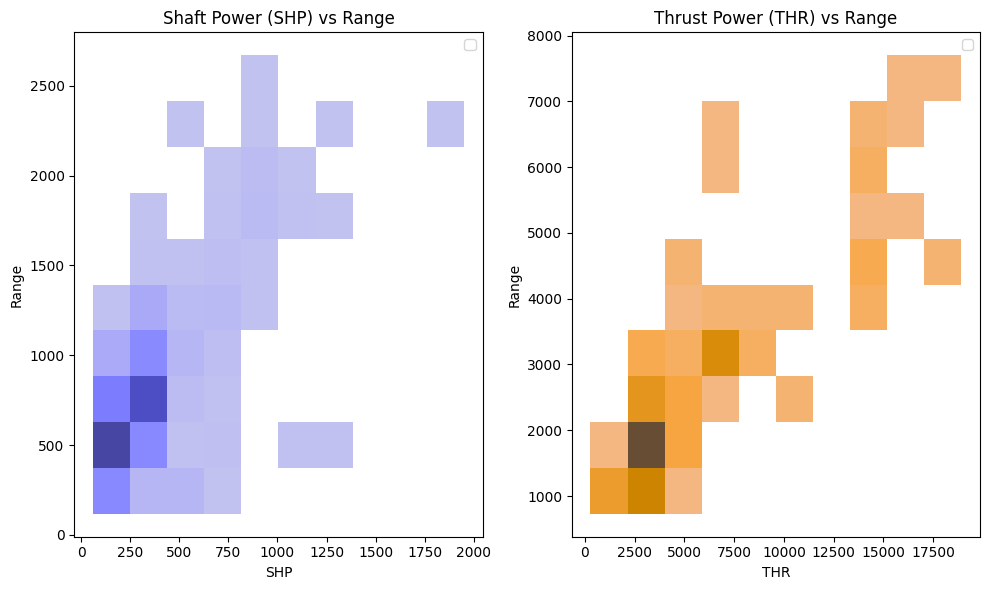

In [44]:
# Create two separate histograms for 'SHP' and 'THR'
plt.figure(figsize=(10, 6))

# Subplot 1: SHP
plt.subplot(1, 2, 1)
sns.histplot(data=aircraft_performance_dataset, x='SHP', y='Range', bins=10, kde=True, color='blue', label='SHP')
plt.title('Shaft Power (SHP) vs Range')
plt.xlabel('SHP')
plt.ylabel('Range')
plt.legend()

# Subplot 2: THR
plt.subplot(1, 2, 2)
sns.histplot(data=aircraft_performance_dataset, x='THR', y='Range', bins=10, kde=True, color='orange', label='THR')
plt.title('Thrust Power (THR) vs Range')
plt.xlabel('THR')
plt.ylabel('Range')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

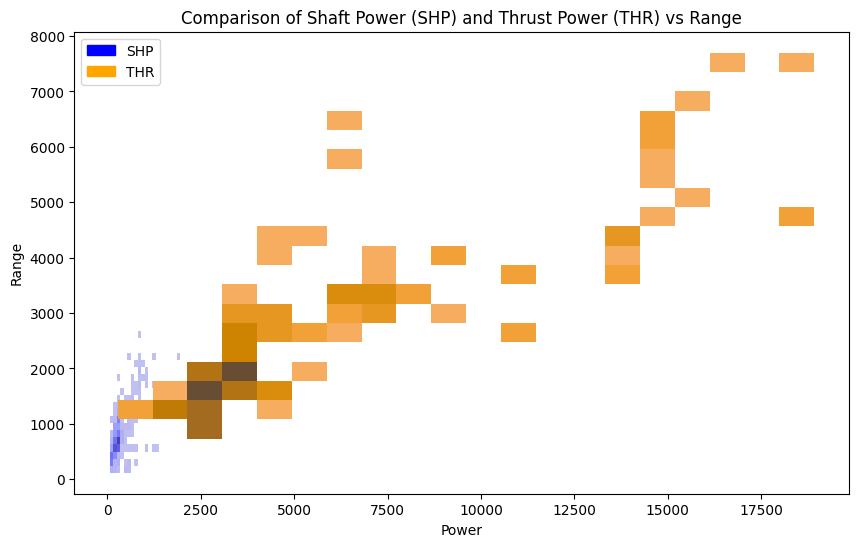

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create two separate histograms for 'SHP' and 'THR'
plt.figure(figsize=(10, 6))

# Histogram for 'SHP'
sns.histplot(data=aircraft_performance_dataset, x='SHP', y='Range', bins=20, kde=True, color='blue', label='SHP')

# Histogram for 'THR'
sns.histplot(data=aircraft_performance_dataset, x='THR', y='Range', bins=20, kde=True, color='orange', label='THR')

# Set plot title and labels
plt.title('Comparison of Shaft Power (SHP) and Thrust Power (THR) vs Range')
plt.xlabel('Power')
plt.ylabel('Range')

# Define custom legend
legend_labels = ['SHP', 'THR']
legend_colors = ['blue', 'orange']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the right-hand side with color labels
plt.legend(handles=legend_patches, loc='upper left')

# Show plot
plt.show()


<p style="color: #C837A0;"> 
We understand two things from graph above:

<ul style="color: #C837A0;">
    <li>Power ∝ Range. There are some cases where higher thrust power still leads to same range. However, it could be then due to other parameters. However, in majority cases, as thrust power increases, range increases</li>
    <li>Aircrafts that uses "Thrust" engine generally have a larger range</li>
</ul>

</p>

In [46]:
##Combined both SHP and THR into one column 'Power'
aircraft_performance_dataset['Power'] = aircraft_performance_dataset['SHP'].combine_first(aircraft_performance_dataset['THR'])
aircraft_performance_dataset.drop(['SHP', 'THR'], axis=1, inplace=True)
aircraft_performance_dataset = aircraft_performance_dataset[['Model', 'Company', 'Engine Type', 'Power', 'Length', 'Height', 'Wing Span', 'FW',	'MEW', 'AUW', 'Vmax', 'Vcruise', 'Hmax', 'ROC',	'Range']]
aircraft_performance_dataset

,Model,Company,Engine Type,Power,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


In [47]:
aircraft_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        860 non-null    object 
 1   Company      860 non-null    object 
 2   Engine Type  860 non-null    object 
 3   Power        860 non-null    float64
 4   Length       846 non-null    float64
 5   Height       843 non-null    float64
 6   Wing Span    856 non-null    float64
 7   FW           855 non-null    float64
 8   MEW          840 non-null    float64
 9   AUW          857 non-null    float64
 10  Vmax         817 non-null    float64
 11  Vcruise      838 non-null    float64
 12  Hmax         827 non-null    float64
 13  ROC          798 non-null    float64
 14  Range        815 non-null    float64
dtypes: float64(12), object(3)
memory usage: 100.9+ KB


In [48]:
aircraft_performance_dataset.head(5)

,Model,Company,Engine Type,Power,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0


<p style="color: #C837A0;"> The provided dataset doesn't contain correct values. Some values are correct but even values on different websites differ. As a result, we can say that the values are correct. But we can use it as a test/simulation dataset, which we can just use for calculations or seeing how model will do prediction. We can also try calculating those values
</p>

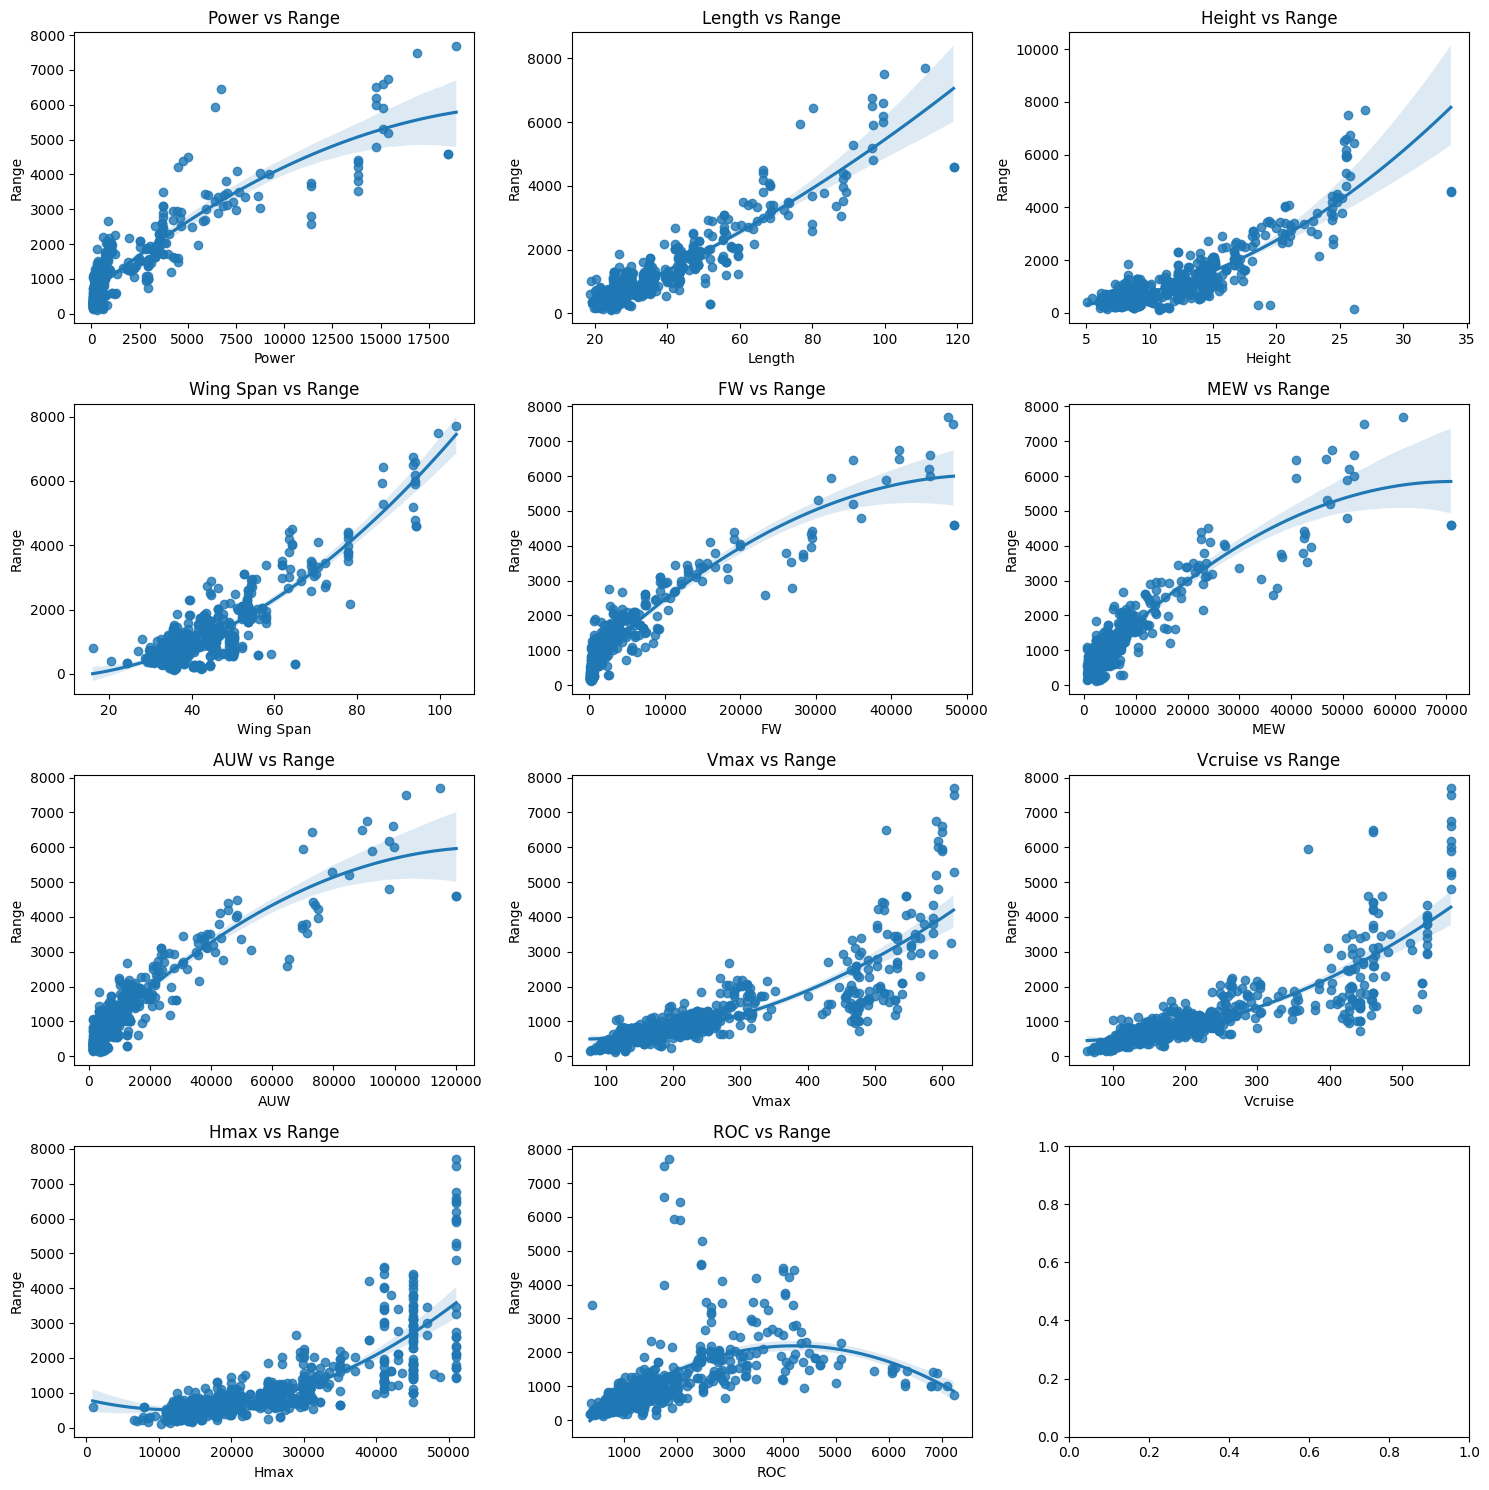

In [49]:
parameters = ['Power', 'Length', 'Height', 'Wing Span', 'FW', 'MEW', 'AUW', 'Vmax', 'Vcruise', 'Hmax', 'ROC']


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()


for i, param in enumerate(parameters):
    sns.regplot(data=aircraft_performance_dataset, x=param, y='Range', order=2, ax=axes[i])
    axes[i].set_title(f'{param} vs Range')

plt.tight_layout()
plt.show()

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Check how you can fill in these null values</li>
<li> Find what parameters you can calculate</li>
<li> Train model</li> 
</ul>

## About the dataset

- **Aircraft Information:** Model, Company, Engine Type, Multi Engine, TP Models
- **Physical Characteristics:** Length, Height, Wing Span, FW (Fuel Weight), MEW (Manufacturer's Empty Weight), AUW (All-Up Weight)
- **Performance Metrics:** Vmax (Max Speed), Vcruise (Recommended Cruise Speed), Vstall (Stall Speed), ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll), Range

<br><br>

### Parameters Related to Aerodynamics, Flight Mechanics, or Others:

- **Aerodynamics:** Parameters such as Vmax (Max Speed), Vcruise (Recommended Cruise Speed), Vstall (Stall Speed), ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll) are directly related to aerodynamics and flight performance.
- **Flight Mechanics:** Parameters like ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll) are related to flight mechanics as they describe the aircraft's behavior during takeoff, landing, and climb.

<br><br>

### Using Parameters to Calculate Different Parameters:
- **Climb Gradient:** Calculate the aircraft's climb gradient based on its rate of climb and ground speed.
- **Lift-to-Drag Ratio (L/D):** Estimate the lift-to-drag ratio of the aircraft based on its aerodynamic parameters such as wing span and drag coefficient.
- **Breguets Range Equation:**

--------------------------------------------------------------

--------------------------------------------------------------

--------------------------------------------------------------

# <font color=33FFF9> **Investigating Aircraft Weight and Balance Metrics**</font>
<p> The dataset is taken from the following link: <a href="https://www.kaggle.com/datasets/aadharshviswanath/investigating-aircraft-weight-and-balance-metrics">Aircraft Weight & Balance Metrics</a>

This dataset offers a comprehensive compilation of weight and balance information for a diverse array of aircraft models that are extensively employed in aviation operations. 

## <font style="color: #CE33FF;"> Parameters: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Aircraft Model:</span></strong> Airplane's name.</li>
    <li><strong><span style="color: #374DC8;">Empty Weight (kg):</span></strong> The weight of the aircraft when empty, including the airframe, engines, avionics, and other essential equipment.</li>
    <li><strong><span style="color: #374DC8;">Maximum Takeoff Weight (kg):</span></strong> The maximum weight at which the aircraft is certified to take off, including passengers, cargo, and fuel.</li>
    <li><strong><span style="color: #374DC8;">Maximum Landing Weight (kg)</span></strong> The maximum weight at which the aircraft is certified to land safely.</li>
    <li><strong><span style="color: #374DC8;">Center of Gravity Limits:</span></strong> The range within which the center of gravity of the aircraft must be located for safe flight, expressed as a percentage of the Mean Aerodynamic Chord (MAC).</li>
    <li><strong><span style="color: #374DC8;">Wing Loading (kg/m²):</span></strong> The load per unit area of the wing, is calculated by dividing the maximum takeoff weight by the wing area. </li>
    <li><strong><span style="color: #374DC8;">Tail Loading (kg/m²)</span></strong> Similar to wing loading, but for the tail section of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Fuel Capacity (liters)</span></strong> The maximum amount of fuel the aircraft can carry, influencing its range and endurance.</li>
    <li><strong><span style="color: #374DC8;">Number of Passengers:</span></strong> The maximum number of passengers the aircraft can accommodate.</li>
    <li><strong><span style="color: #374DC8;">Cargo Capacity (kg):</span></strong> The maximum weight of cargo or baggage the aircraft can carry.</li> 
    <li><strong><span style="color: #374DC8;">Maximum Altitude (ft)</span></strong> The maximum altitude at which the aircraft can safely operate.</li>
    <li><strong><span style="color: #374DC8;">Maximum Speed (knots):</span></strong> The maximum speed the aircraft can reach, typically measured in knots (nautical miles per hour).</li>
    <li><strong><span style="color: #374DC8;">Engine Type:</span></strong> The type of engines used on the aircraft, such as turbofan or turboprop.</li>
    <li><strong><span style="color: #374DC8;">Fuselage Length (m):</span></strong> The length of the aircraft's fuselage, which may impact aerodynamics and weight distribution.</li>
</ul>

In [24]:
airplane_weight_dataset = pd.read_csv('Datasets/Investigating Aircraft Weight and Balance Metrics/Investigating Aircraft Weight and Balance Metrics.csv')
airplane_weight_dataset = airplane_weight_dataset.drop(['Unnamed: 0'], axis=1)
airplane_weight_dataset

,Aircraft Model,Empty Weight (kg),Maximum Takeoff Weight (kg),Maximum Landing Weight (kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,Airbus A320,149968.187455,2.795251e+05,255896.490294,25%-35% of MAC,818.558281,124.788364,52538.236167,472,80061.732289,44470,658,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,143703.314584,15%-30% of MAC,366.423230,111.743182,298000.265987,257,27118.725192,31739,495,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,270662.904304,20%-35% of MAC,829.145903,138.672695,176299.254601,172,1002.209110,24398,585,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,183594.487162,15%-30% of MAC,290.845909,169.249463,51211.630194,444,75726.083545,26793,632,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,233683.883944,20%-35% of MAC,509.848919,32.282885,494662.501258,55,45268.322065,30982,663,Piston,80.394753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Bombardier Global 6000,231639.994390,3.836723e+05,342423.233107,20%-35% of MAC,386.181592,75.389841,343170.196838,421,10838.506279,35895,557,Turboprop,55.817305
24996,Bombardier Global 6000,221255.359587,1.074710e+06,276781.653473,15%-30% of MAC,367.397978,199.633207,311523.190561,462,58961.668447,25187,588,Turbofan,15.447788
24997,Gulfstream G650,34559.592817,1.272493e+05,125404.410579,20%-40% of MAC,517.456695,147.840228,97968.104728,289,60801.747075,36838,441,Turboprop,58.920670
24998,Beechcraft King Air 350,94871.536439,2.573037e+05,191036.131733,20%-35% of MAC,782.307394,120.828459,39422.458907,421,35974.887809,52334,673,Turboprop,69.698684


In [25]:
airplane_weight_dataset = airplane_weight_dataset.rename(columns={'Aircraft Model': 'Aircraft_Model', 'Empty Weight (kg)': 'Empty_Weight', 'Max Gross Weight (kg)': 'Max_Gross_Weight', 'Maximum Takeoff Weight (kg)': 'Max_Takeoff_Weight',
                                                                  'Maximum Landing Weight (kg)': 'Max_Landing_Weight', 'Center of Gravity Limits': 'Center_of_Gravity_Limits', 'Wing Loading (kg/m²)': 'Wing_Loading',
                                                                  'Tail Loading (kg/m²)': 'Tail_Loading', 'Fuel Capacity (liters)': 'Fuel_Capacity', 'Number of Passengers': 'Number_of_Passengers', 
                                                                  'Cargo Capacity (kg)': 'Cargo_Capacity', 'Maximum Altitude (ft)': 'Max_Altitude', 
                                                                  'Maximum Speed (knots)': 'Max_Speed', 'Engine Type': 'Engine_Type', 'Fuselage Length (m)': 'Fuselage_Length'})
airplane_weight_dataset = airplane_weight_dataset.drop(['Number_of_Passengers', 'Cargo_Capacity'], axis=1)
airplane_weight_dataset

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,149968.187455,2.795251e+05,255896.490294,25%-35% of MAC,818.558281,124.788364,52538.236167,44470,658,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,143703.314584,15%-30% of MAC,366.423230,111.743182,298000.265987,31739,495,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,270662.904304,20%-35% of MAC,829.145903,138.672695,176299.254601,24398,585,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,183594.487162,15%-30% of MAC,290.845909,169.249463,51211.630194,26793,632,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,233683.883944,20%-35% of MAC,509.848919,32.282885,494662.501258,30982,663,Piston,80.394753
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Bombardier Global 6000,231639.994390,3.836723e+05,342423.233107,20%-35% of MAC,386.181592,75.389841,343170.196838,35895,557,Turboprop,55.817305
24996,Bombardier Global 6000,221255.359587,1.074710e+06,276781.653473,15%-30% of MAC,367.397978,199.633207,311523.190561,25187,588,Turbofan,15.447788
24997,Gulfstream G650,34559.592817,1.272493e+05,125404.410579,20%-40% of MAC,517.456695,147.840228,97968.104728,36838,441,Turboprop,58.920670
24998,Beechcraft King Air 350,94871.536439,2.573037e+05,191036.131733,20%-35% of MAC,782.307394,120.828459,39422.458907,52334,673,Turboprop,69.698684


In [26]:
airplane_weight_dataset.head(10)

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,149968.187455,2.795251e+05,2.558965e+05,25%-35% of MAC,818.558281,124.788364,52538.236167,44470,658,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,1.437033e+05,15%-30% of MAC,366.423230,111.743182,298000.265987,31739,495,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,2.706629e+05,20%-35% of MAC,829.145903,138.672695,176299.254601,24398,585,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,1.835945e+05,15%-30% of MAC,290.845909,169.249463,51211.630194,26793,632,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,2.336839e+05,20%-35% of MAC,509.848919,32.282885,494662.501258,30982,663,Piston,80.394753
5,Embraer E190,236729.193146,1.138953e+06,8.542982e+05,25%-35% of MAC,543.291091,20.334139,357994.599979,55066,554,Turbofan,69.438743
6,Cessna 172,297983.775694,1.272807e+06,1.126507e+06,20%-35% of MAC,733.617455,112.197692,222825.243817,21373,516,Piston,74.324203
7,Boeing 737-800,280603.816883,3.022066e+05,2.937549e+05,25%-35% of MAC,440.424291,80.249872,275771.977311,30947,608,Turbofan,44.526518
8,Boeing 747-8,214038.935441,9.520979e+05,4.048373e+05,20%-40% of MAC,582.397343,26.221354,308066.435003,39719,587,Turbofan,94.068385
9,Airbus A320,154058.132387,7.554157e+05,5.994054e+05,20%-40% of MAC,471.443155,181.546633,95243.904563,46354,692,Piston,64.784785


In [27]:
airplane_weight_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aircraft_Model            25000 non-null  object 
 1   Empty_Weight              25000 non-null  float64
 2   Max_Takeoff_Weight        25000 non-null  float64
 3   Max_Landing_Weight        25000 non-null  float64
 4   Center_of_Gravity_Limits  25000 non-null  object 
 5   Wing_Loading              25000 non-null  float64
 6   Tail_Loading              25000 non-null  float64
 7   Fuel_Capacity             25000 non-null  float64
 8   Max_Altitude              25000 non-null  int64  
 9   Max_Speed                 25000 non-null  int64  
 10  Engine_Type               25000 non-null  object 
 11  Fuselage_Length           25000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 2.3+ MB


In [28]:
airplane_weight_dataset = convert_weight_to_lbs(airplane_weight_dataset, 'Empty_Weight', 'Max_Takeoff_Weight', 'Max_Landing_Weight', kg=True)
airplane_weight_dataset = convert_loading(airplane_weight_dataset, 'Wing_Loading', 'Tail_Loading', kg_m2=True)
airplane_weight_dataset = convert_length_to_ft(airplane_weight_dataset, 'Fuselage_Length', meters=True)
airplane_weight_dataset

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,299936.374909,5.590502e+05,511792.980587,25%-35% of MAC,19424.388019,2961.227870,52538.236167,44470,658,Turbofan,136.899011
1,Boeing 777,281711.759783,2.901103e+05,287406.629167,15%-30% of MAC,8695.223251,2651.665711,298000.265987,31739,495,Turbofan,178.486879
2,Airbus A320,302049.197816,1.068688e+06,541325.808608,20%-35% of MAC,19675.632269,3290.703058,176299.254601,24398,585,Turboprop,94.698449
3,Airbus A320,361778.909544,1.630372e+06,367188.974325,15%-30% of MAC,6901.773420,4016.289763,51211.630194,26793,632,Turboprop,151.284817
4,Embraer E190,227710.346572,8.781887e+05,467367.767887,20%-35% of MAC,12098.714859,766.072853,494662.501258,30982,663,Piston,263.762322
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Bombardier Global 6000,463279.988780,7.673447e+05,684846.466213,20%-35% of MAC,9164.089181,1789.000934,343170.196838,35895,557,Turboprop,183.127646
24996,Bombardier Global 6000,442510.719175,2.149419e+06,553563.306946,15%-30% of MAC,8718.354010,4737.296005,311523.190561,25187,588,Turbofan,50.681721
24997,Gulfstream G650,69119.185634,2.544987e+05,250808.821157,20%-40% of MAC,12279.247382,3508.248601,97968.104728,36838,441,Turboprop,193.309291
24998,Beechcraft King Air 350,189743.072877,5.146075e+05,382072.263466,20%-35% of MAC,18564.154463,2867.259336,39422.458907,52334,673,Turboprop,228.670229


In [29]:
airplane_weight_dataset.head(10)

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,299936.374909,5.590502e+05,5.117930e+05,25%-35% of MAC,19424.388019,2961.227870,52538.236167,44470,658,Turbofan,136.899011
1,Boeing 777,281711.759783,2.901103e+05,2.874066e+05,15%-30% of MAC,8695.223251,2651.665711,298000.265987,31739,495,Turbofan,178.486879
2,Airbus A320,302049.197816,1.068688e+06,5.413258e+05,20%-35% of MAC,19675.632269,3290.703058,176299.254601,24398,585,Turboprop,94.698449
3,Airbus A320,361778.909544,1.630372e+06,3.671890e+05,15%-30% of MAC,6901.773420,4016.289763,51211.630194,26793,632,Turboprop,151.284817
4,Embraer E190,227710.346572,8.781887e+05,4.673678e+05,20%-35% of MAC,12098.714859,766.072853,494662.501258,30982,663,Piston,263.762322
5,Embraer E190,473458.386292,2.277905e+06,1.708596e+06,25%-35% of MAC,12892.297596,482.529110,357994.599979,55066,554,Turbofan,227.817407
6,Cessna 172,595967.551388,2.545614e+06,2.253014e+06,20%-35% of MAC,17408.742208,2662.451225,222825.243817,21373,516,Piston,243.845820
7,Boeing 737-800,561207.633765,6.044132e+05,5.875098e+05,25%-35% of MAC,10451.268418,1904.329465,275771.977311,30947,608,Turbofan,146.084382
8,Boeing 747-8,428077.870882,1.904196e+06,8.096747e+05,20%-40% of MAC,13820.288951,622.232735,308066.435003,39719,587,Turbofan,308.623320
9,Airbus A320,308116.264774,1.510831e+06,1.198811e+06,20%-40% of MAC,11187.346062,4308.101599,95243.904563,46354,692,Piston,212.548513


<p style="color: #C837A0;"> The parameters provided in the dataset do not align with the original values provided in aircraft booklets or wikipedia. Hence, I am not sure how this data was created. I emailed the guy, and currently waiting for his reply</p>

In [36]:
aircraft_duplicates = ps.sqldf(""" SELECT Aircraft_Model, COUNT(*) as total_reoccurences
                    from  airplane_weight_dataset
                    GROUP BY Aircraft_Model
                    ORDER BY COUNT(*) DESC """)
aircraft_duplicates

,Aircraft_Model,total_reoccurences
0,Beechcraft King Air 350,2568
1,Boeing 747-8,2537
2,Airbus A320,2533
3,Airbus A380,2513
4,Boeing 737-800,2508
5,Boeing 777,2499
6,Gulfstream G650,2494
7,Cessna 172,2457
8,Embraer E190,2456
9,Bombardier Global 6000,2435


In [37]:
print(f"Sum of total duplicates: {aircraft_duplicates['total_reoccurences'].sum()}")

Sum of total duplicates: 25000


In [38]:
unique_aircrafts = ps.sqldf(""" SELECT COUNT(DISTINCT Aircraft_Model) as unique_aircrafts from airplane_weight_dataset""")
unique_aircrafts

,unique_aircrafts
0,10


<p style="color: #C837A0;"> After examining the dataset, it's apparent that there's a recurring pattern involving only 10 specific aircraft. Consequently, the results derived from this dataset may not accurately reflect the original parameters outlined in the aircraft booklet. It seems that the dataset primarily consists of repeated information for these 10 aircraft, resembling simulation data.</p>

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Remove the extra column (✅)</li>
<li> Check data types of parameters (✅)</li>
<li> Make values in standard units (✅)</li>
<li> Check if the values are correct (✅)</li>
<li> Check if there are any duplicate aircraft models. If yes then why? (✅)</li>
<li> Check if for some aircrafts, you can combine the results with other table. For example, if you can combine it with "Turbo Fuel Consumption" or "Top 60 Aircrafts" table (❌)</li>
<li> Check the parameters you can calculate using these parameters(❌)</li>
</ul>

## About the dataset
The parameters could be divided into three types:

- **Aerodynamics**
    - Wing Loading (kg/m²)
    - Tail Loading (kg/m²)
- **Aircraft Specification**        
    - Empty Weight (kg)
    - Maximum Takeoff Weight (kg)
    - Maximum Landing Weight (kg)
    - Center of Gravity Limits (% of Mean Aerodynamic Chord)
    - Fuel Capacity (liters)
    - Number of Passengers
    - Cargo Capacity (kg)
    - Engine Type
    - Fuselage Length (m)<br>
- **Performance Characteristics:**
    - Range
    - Endurance
    - Maximum Altitude (ft)
    - Maximum Speed (knots)


<br><br>

Using these sub-parameters, you can calculate or estimate the main parameters as follows:

- **Range:** Calculate based on fuel capacity, fuel consumption rate, and cruise speed.
- **Endurance:** Calculate based on fuel capacity, fuel consumption rate, and cruise speed.
- **Payload Capacity:** Calculate based on maximum takeoff weight, empty weight, cargo capacity, and number of passengers.
- **Maximum Altitude:** Estimate based on engine type, wing loading, tail loading, and maximum takeoff weight.
- **Maximum Speed:** Estimate based on engine type, maximum takeoff weight, fuselage length, and wing loading.

--------------------------------------------------------------

--------------------------------------------------------------

--------------------------------------------------------------

# <font color=33FFF9>**The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft**</font>

<p> The dataset is taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/TextHirsch.pdf">The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft</a>

Request to use the dataset has been granted. 

## <font style="color: #CE33FF;"> Parameters: </font>


<ul>
    <li><strong><span style="color: #374DC8;">Manufacturer:</span></strong> The company that manufactures the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Aircraft type:</span></strong> The specific type or model designation of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Total number of operating A/C:</span></strong> The total number of aircraft of this type currently in operation.</li>
    <li><strong><span style="color: #374DC8;">Option/Variant:</span></strong> Any optional configurations or variants of the aircraft model.</li>
    <li><strong><span style="color: #374DC8;">Engine:</span></strong> The type or model of engine(s) used in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">No. of Engines:</span></strong> The total number of engines installed on the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> The specific model name or designation of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Max. Rated Takeoff Thrust (T_TO):</span></strong> The maximum rated thrust produced by the engines during takeoff, typically measured in kilonewtons (kN).</li>
    <li><strong><span style="color: #374DC8;">Equivalent Power (P):</span></strong> The equivalent power of the engines, typically measured in kilowatts (kW).</li>
    <li><strong><span style="color: #374DC8;">Propeller:</span></strong> Information about the propeller(s) used in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Cabin Length (l_CABIN):</span></strong> The length of the cabin, which is the passenger compartment of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Max. Height of Cabin (h_CABIN):</span></strong> The maximum height of the cabin, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Max. Width of Cabin (d_F,I):</span></strong> The maximum width of the cabin, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Passenger Compartment Volume (V_CABIN):</span></strong> The volume of the passenger compartment or cabin, typically measured in cubic meters (m³).</li>
    <li><strong><span style="color: #374DC8;">Fuselage Height (h_F):</span></strong> The height of the fuselage, which is the main body of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Fuselage Width (w_F):</span></strong> The width of the fuselage, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Total Length of Aircraft (l_A/C):</span></strong> The total length of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wingspan (b_W):</span></strong> The wingspan of the aircraft, which is the distance from one wingtip to the other, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Height of Aircraft (h_A/C):</span></strong> The height of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Landing Gear Track (l_T):</span></strong> The track width of the landing gear, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wheelbase (l_WB):</span></strong> The wheelbase of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wing Area (S_W):</span></strong> The total wing area of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Taper ratio of Wing (λ_W):</span></strong> The taper ratio of the wings, which is the ratio of the root chord to the tip chord.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Wing (φ_25,W):</span></strong> The 1/4 chord sweep of the wings, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Vertical Tail Area (S_V):</span></strong> The total area of the vertical tail of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Height of Vertical Tail (b_V):</span></strong> The height of the vertical tail, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Taper ratio of Vertical Tail (λ_V):</span></strong> The taper ratio of the vertical tail.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Vertical Tail (φ_25,V):</span></strong> The 1/4 chord sweep of the vertical tail, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Horizontal Tail Area (S_H):</span></strong> The total area of the horizontal tail of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Span of Horizontal Tail (b_H):</span></strong> The span of the horizontal tail, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Taper Ratio of Horizontal Tail (λ_H):</span></strong> The taper ratio of the horizontal tail.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Horizontal Tail (φ_25,H):</span></strong> The 1/4 chord sweep of the horizontal tail, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Cruise V_MO (kt):</span></strong> The cruise speed limit in knots (kt).</li>
    <li><strong><span style="color: #374DC8;">Cruise M_MO (Mach):</span></strong> The cruise speed limit in Mach.</li>
    <li><strong><span style="color: #374DC8;">Cruise Speed (M_CR):</span></strong> The cruise speed of the aircraft, typically measured in Mach.</li>
    <li><strong><span style="color: #374DC8;">Max. Certified Flight Level (h_MCR):</span></strong> The maximum certified flight level, typically measured in flight levels (FL).</li>
    <li><strong><span style="color: #374DC8;">Cruise Altitude (h_CR):</span></strong> The cruise altitude of the aircraft, typically measured in flight levels (FL).</li>
    <li><strong><span style="color: #374DC8;">Fuel Unusable Fuel (l):</span></strong> The amount of fuel considered unusable, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Optional Fuel (l):</span></strong> The amount of optional fuel that can be carried, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Max usable fuel (l):</span></strong> The maximum usable fuel capacity, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Range Max. Payload (R_MPL) (nm):</span></strong> The maximum range with maximum payload, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Max. Pax (R_M.pax) (nm):</span></strong> The maximum range with maximum passengers, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Max. Range (R_PLMR) (nm):</span></strong> The maximum range of the aircraft, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Ramp (m_MR) (MRM) (kg):</span></strong> The maximum ramp weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Take-Off (m_MTO) (MTOM) (kg):</span></strong> The maximum take-off weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Landing (m_ML) (MLM) (kg):</span></strong> The maximum landing weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Zero Fuel (m_MZF) (MZFM) (kg):</span></strong> The maximum zero fuel weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Operating Empty (m_OE) (OEM) (MZFM-MPL) (kg):</span></strong> The operating empty weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Payload (m_MPL) (MPL) (kg):</span></strong> The maximum payload capacity of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Payload at Max. Range (m_PLMR) (kg):</span></strong> The payload capacity at maximum range, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Cargo Volume (V_CARGO) (m³):</span></strong> The volume of cargo space available, typically measured in cubic meters (m³).</li>
    <li><strong><span style="color: #374DC8;">Cargo Capacity:</span></strong> Information about the cargo capacity of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Max Pallet Underfloor:</span></strong> Maximum pallet capacity under the floor of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Seats Max:</span></strong> Maximum number of seats available in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Std. Layout:</span></strong> Information about the standard layout of seats in the aircraft.</li>
</ul>


### <font style="color: #CE33FF;"> Aerodynamics: </font>

<ul>
    <li><strong>Wingspan (b_W):</strong> Main parameter. Used to calculate wing aspect ratio and lift distribution.</li>
    <li><strong>Wing Area (S_W):</strong> Main parameter. Used to calculate wing loading and lift coefficient.
        <ul>
            <li><strong>Taper ratio of Wing (λ_W):</strong> Sub-parameter. Affects lift distribution and aerodynamic efficiency.</li>
            <li><strong>1/4 Chord Sweep of Wing (φ_25,W):</strong> Sub-parameter. Affects aerodynamic performance and stability.</li>
        </ul>
    </li>
    <li><strong>Vertical Tail Area (S_V):</strong> Main parameter. Used to calculate tail volume coefficient and stability.
        <ul>
            <li><strong>Taper ratio of Vertical Tail (λ_V):</strong> Sub-parameter. Affects tail effectiveness and stability.</li>
            <li><strong>1/4 Chord Sweep of Vertical Tail (φ_25,V):</strong> Sub-parameter. Affects tail performance and stability.</li>
        </ul>
    </li>
    <li><strong>Horizontal Tail Area (S_H):</strong> Main parameter. Used to calculate tail volume coefficient and stability.
        <ul>
            <li><strong>Taper Ratio of Horizontal Tail (λ_H):</strong> Sub-parameter. Affects tail effectiveness and stability.</li>
            <li><strong>1/4 Chord Sweep of Horizontal Tail (φ_25,H):</strong> Sub-parameter. Affects tail performance and stability.</li>
        </ul>
    </li>
</ul>


### <font style="color: #CE33FF;"> Flight Mechanics: </font>
<ul>
    <li><strong>Max. Rated Takeoff Thrust (T_TO):</strong> Main parameter. Used for thrust-to-weight ratio and takeoff performance.</li>
    <li><strong>Equivalent Power (P):</strong> Main parameter. Used for power loading and climb performance.</li>
    <li><strong>Max. Certified Flight Level (h_MCR):</strong> Main parameter. Defines maximum flight altitude.</li>
    <li><strong>Cruise Speed (M_CR):</strong> Main parameter. Defines cruising speed.</li>
    <li><strong>Cruise Altitude (h_CR):</strong> Main parameter. Defines cruising altitude.</li>
    <li><strong>Mass: Max. Take-Off (m_MTO) (MTOM) (kg):</strong> Main parameter. Defines maximum takeoff weight.</li>
    <li><strong>Mass: Max. Landing (m_ML) (MLM) (kg):</strong> Main parameter. Defines maximum landing weight.</li>
    <li><strong>Mass: Max. Zero Fuel (m_MZF) (MZFM) (kg):</strong> Main parameter. Defines maximum zero fuel weight.</li>
    <li><strong>Mass: Operating Empty (m_OE) (OEM) (MZFM-MPL) (kg):</strong> Main parameter. Defines operating empty weight.</li>
    <li><strong>Mass: Max. Payload (m_MPL) (MPL) (kg):</strong> Main parameter. Defines maximum payload weight.</li>
    <li><strong>Range Max. Payload (R_MPL) (nm):</strong> Main parameter. Defines maximum range with payload.</li>
</ul>

### <font style="color: #CE33FF;"> Other Parameters: </font>
<ul>
    <li><strong>Manufacturer:</strong> Identification parameter.</li>
    <li><strong>Aircraft type:</strong> Identification parameter.</li>
    <li><strong>Total number of operating A/C:</strong> Operational parameter.</li>
    <li><strong>Option/Variant:</strong> Configuration parameter.</li>
    <li><strong>Engine:</strong> Identification parameter.</li>
    <li><strong>No. of Engines:</strong> Configuration parameter.</li>
    <li><strong>Model:</strong> Identification parameter.</li>
    <li><strong>Propeller:</strong> Configuration parameter.</li>
    <li><strong>Cabin Length (l_CABIN):</strong> Interior parameter.</li>
    <li><strong>Max. Height of Cabin (h_CABIN):</strong> Interior parameter.</li>
    <li><strong>Max. Width of Cabin (d_F,I):</strong> Interior parameter.</li>
    <li><strong>Passenger Compartment Volume (V_CABIN):</strong> Interior parameter.</li>
    <li><strong>Fuselage Height (h_F):</strong> Exterior parameter.</li>
    <li><strong>Fuselage Width (w_F):</strong> Exterior parameter.</li>
    <li><strong>Total Length of Aircraft (l_A/C):</strong> Exterior parameter.</li>
    <li><strong>Landing Gear Track (l_T):</strong> Landing gear parameter.</li>
    <li><strong>Wheelbase (l_WB):</strong> Landing gear parameter.</li>
    <li><strong>Fuel Unusable Fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Optional Fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Max usable fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Max. Pax (R_M.pax) (nm):</strong> Passenger parameter.</li>
    <li><strong>Max. Range (R_PLMR) (nm):</strong> Range parameter.</li>
    <li><strong>Mass: Max. Ramp (m_MR) (MRM) (kg):</strong> Mass parameter.</li>
    <li><strong>Mass: Payload at Max. Range (m_PLMR) (kg):</strong> Mass parameter.</li>
    <li><strong>Cargo Volume (V_CARGO) (m³):</strong> Cargo parameter.</li>
    <li><strong>Cargo Capacity:</strong> Cargo parameter.</li>
    <li><strong>Max Pallet Underfloor:</strong> Cargo parameter.</li>
    <li><strong>Seats Max:</strong> Passenger parameter.</li>
    <li><strong>Std. Layout:</strong> Passenger parameter.</li>
</ul>


In [9]:
para_for_60_aircrafts = pd.read_excel('Datasets/The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft_Dataset/Aircraft_Database.xlsx')
para_for_60_aircrafts = para_for_60_aircrafts.drop(['A/C'], axis=1)
para_for_60_aircrafts.drop(para_for_60_aircrafts.tail(3).index, inplace = True)
para_for_60_aircrafts.columns = para_for_60_aircrafts.iloc[0]
para_for_60_aircrafts = para_for_60_aircrafts[1:]
para_for_60_aircrafts

,Aircraft type,A220-300,A319ceo,A319neo,A320ceo,A320neo,A321ceo,A321neo,A330-200,A330-300,A330-900,A350-900,A350-1000,A380,AN-24,ATR 42,ATR 72,Jetstream 31/32,99,1900C,1900D,717-200,737-300,737-400,737-500,737-700,737-800,737-900,737-900ER,737-8,757-200,MD-80,MD-80,747-400,747-400,767-300,767-300,777-200,777-200,777-300ER,787-8,787-9,787-10,CRJ200,CRJ700,CRJ900,Dash 8 Q100,Dash 8 Q300,Dash 8 Q400,EMB 120,EMB145,EMB145,EMB145,170,175,190,195,Merlin,Metro,Fokker 50,Fokker 100,Saab 340,Superjet 100,Twin Otter
1,Total number of operating A/C,72,1243,0,4132,1009,1591,355,502,707,47,321,43,237,97,208,795,101,107,121,220,145,214,141,161,979,4788,556*,556*,347,302,232*,232*,123*,123*,365*,365*,391*,391*,805,363,540,58,601,291,471,152,157,462,127,479*,479*,479*,157,624,501,161,220*,220*,86,109,188,131,315
2,Option/Variant,-,-,-,-,-,-,-,A330-203,A330-303,A330-941,A350-941,A350-1041,A380-800,RV,42-500/-600,72-212A/-600,32,C99,-,-,HGW,-,-,-,-,-,-,-,-,-,MD-82/-88,MD-87,747-400,747-400ER,767-300,767-300ER,777-200,777-200ER,-,-,-,-,LR,ER,CL-6002D24,DHC-8-106,DHC-8-301,DHC-8-402,ER,ER,LR,XR,-,LR,-,AR,SA227-T,SA226-TC,F27 Mark 050,F28 Mark 0100,340B,SSJ100/95B,DHC-6 400
3,No. of Engines,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Model,PW1521G,CFM56-5A5,LEAP-1A26,CFM56-5B4,LEAP-1A29,CFM56-5B1,LEAP-1A32,CF6-80E1A3,CF6-80E1A3,7000-72,XWB-84,XWB-97,970B-84,AI-24,PW127M,PW127M/N,TPE 331-12UHR,PT6A-36,PT6A-65B,PT6A-67D,BR700-715C1-30,CFM56-3B-2,CFM56-3C-1,CFM56-3B-1,CFM56-7B22,CFM56-7B22,CFM56-7B22,CFM56-7B22,LEAP-1B28,PW2040,JT8D-217,JT8D-217C,CF6-80C2B1F,CF6-80C2B5F,RB211-524H,RB211-524H,GE90-94B,GE90-94B,GE90-115BL1,GEnx-1B70,GEnx-1B70,GEnx-1B76,CF34-3B1,CF34-8C1,CF34-8C5,PW121,PW123,PW150A,PW118,AE3007 A1/1,AE3007 A1,AE3007 A1E,CF34-8E5,CF34-8E5,CF34-10E7,CF34-10E7,331-3U-303G,331-3UW-303G,PW125B,Tay 650-15,GE CT7-9B,SaM146,PT6A-34
5,"Max. Rated Takeoff Thrust, T_TO [kN]",97.73,104.53,120.64,120.1,130.29,133.44,143.05,304.84,304.84,323.98,374.5,431.5,348.31,-,-,-,-,-,-,-,95.33,98.3,104.5,89.4,100.97,100.97,100.97,100.97,130.41,181.93,92.7,92.7,254.26,267,269.56,269.56,432.81,432.21,513.95,"321,6 kN","321,6 kN","349,2 kN",41.01,61.34,64.54,-,-,-,-,33.71,33.71,39.67,64.54,64.54,90.57,90.57,-,-,-,67.17,-,71.6,-
6,"Equivalent Power, P [kW]",-,-,-,-,-,-,-,-,-,-,-,-,-,1875,1589,1820,750,526,820,954,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1603,1775,3781,1342,-,-,-,-,-,-,-,618,701,1864,-,1395,-,462
7,Propeller,-,-,-,-,-,-,-,-,-,-,-,-,-,AV-72,568F,568F,R.333/4-82-F/12,HC-B3TN-3/T10173E-8,HC-B4MP-3A/M01877K,HC-E4A-3(x)/E10950,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,14SF-23,14SF-23,R408/6-123-F/17,14RF-9,-,-,-,-,-,-,-,HC-B3TN-5( )/T1028HDB-4R,HC-B3TN-5( )/T10282HB,R352/6-123-F/1,-,14 RF-19,-,HC-B3TN-3D/T10282N
8,"Length, l_CABIN [m]",27.5,23.78,23.78,27.51,27.51,34.44,34.44,45,50.36,50.36,51.04,58.03,49.9,9.69,NaN,NaN,7.39,NaN,7.7,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.42,17.25,21.13,9.16,12.5,18.8,9.38,NaN,NaN,NaN,19.44,21.34,25.91,32.05,3.25,7.75,NaN,21.19,10.4,20.42,5.64
9,"Max. Height, h_CABIN [m]",2.13,2.25,2.25,2.25,2.25,2.25,2.25,2.4,2.4,2.4,2.49,2.49,2.44,1.91,1.91,1.91,1.6,NaN,1.45,1.8,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.13,2.04,2.04,2.41,2.41,2.1,2.1,2.35,2.35,2.39,2.45,2.45,2.45,1.84,1.89,1.89,1.94,1.94,1.95,1.76,1.82,1.82,1.82,2,2,2,2,1.5,1.45,NaN,2.01,1.8,2.12,1.5
10,"Max. Width, d_F,I [m]",3.28,3.7,3.7,3.7,3.7,3.7,3.7,5.26,5.26,5.26,5.61,5.61,6.5,2.76,2.57,2.57,1.91,NaN,1.37,1.37,3.13,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.16,3.16,6.12,6.12,4.72,4.72,5.86,5.86,5.86,5.54,5.54,5.54,2.48,2.55,2.55,2.49,2.49,2.51,2.1,2.1,2.1,2.1,2.74,2.74,2.74,2.74,1.57,1.57,2.5,3.1,2.2,3.24,1.61


In [10]:
print(f"Shape: {para_for_60_aircrafts.shape}")
para_for_60_aircrafts.info()

Shape: (52, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Aircraft type    52 non-null     object
 1   A220-300         49 non-null     object
 2   A319ceo          47 non-null     object
 3   A319neo          47 non-null     object
 4   A320ceo          47 non-null     object
 5   A320neo          47 non-null     object
 6   A321ceo          47 non-null     object
 7   A321neo          47 non-null     object
 8   A330-200         47 non-null     object
 9   A330-300         47 non-null     object
 10  A330-900         47 non-null     object
 11  A350-900         46 non-null     object
 12  A350-1000        45 non-null     object
 13  A380             51 non-null     object
 14  AN-24            41 non-null     object
 15  ATR 42           38 non-null     object
 16  ATR 72           42 non-null     object
 17  Jetstream 31/32  45 n

In [11]:
para_for_60_aircrafts = para_for_60_aircrafts.transpose()
para_for_60_aircrafts.columns = para_for_60_aircrafts.iloc[0]
para_for_60_aircrafts = para_for_60_aircrafts[1:]
para_for_60_aircrafts

Aircraft type,Total number of operating A/C,Option/Variant,No. of Engines,Model,"Max. Rated Takeoff Thrust, T_TO [kN]","Equivalent Power, P [kW]",Propeller,"Length, l_CABIN [m]","Max. Height, h_CABIN [m]","Max. Width, d_F,I [m]","Passenger Compartment Volume, V_CABIN [m³]","Height, h_F [m]","Width, w_F [m]","Length, l_A/C [m]","Span, b_W [m]","Height, h_A/C [m]","Track, l_T [m]","Wheelbase, l_WB [m]","Area, S_W [m²]","Taper ratio, λ_W","1/4 Chord Sweep, φ_25,W [°]","Area, S_V [m²]","Height, b_V [m]","Taper ratio, λ_V","1/4 Chord Sweep, φ_25,V [°]","Area, S_H [m²]","Span, b_H [m]","Taper Ratio, λ_H","1/4 Chord Sweep, φ_25,H [°]",V_MO [kt],M_MO [Mach],"Cruise Speed, M_CR [Mach]","Max. Certified Flight Level, h_MCR [FL]","Cruise Altitude, h_CR [FL]",Unusable Fuel [l],Optional Fuel [l],Max usable fuel [l],"Max. Payload, R_MPL [nm]","Max. Pax, R_M,pax [nm]","Max. Range, R_PLMR [nm]","Max. Ramp, m_MR (MRM) [kg]","Max. Take-Off, m_MTO (MTOM) [kg]","Max. Landing, m_ML (MLM) [kg]","Max. Zero Fuel, m_MZF (MZFM) [kg]","Operating Empty, m_OE (OEM) (MZFM-MPL) [kg]","Max. Payload, m_MPL (MPL) [kg]","Payload at Max. Range, m_PLMR [kg]","Volume, V_CARGO [m³]",Cargo Capacity,Max. Pallet Underfloor,"Max. Seats, n_M,SEAT","Std. Layout, n_SEAT"
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,72,-,2,PW1521G,97.73,-,-,27.5,2.13,3.28,NaN,3.72,3.51,38.7,35.1,11.5,6.73,15.31,112.3,0.26,26,28.2,6,0.35,35.5,36.6,12.26,0.375,30.5,489,0.82,NaN,410,NaN,125,-,21381,2000,3100,3350,71300,70900,58800,55800,43500,12300,6350,27.46,-,-,149,140
A319ceo,1243,-,2,CFM56-5A5,104.53,-,-,23.78,2.25,3.7,120,4.14,3.95,33.84,35.8,11.76,7.59,11.04,NaN,0.25,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,NaN,410,NaN,82,8250,15609,2500,3000,3950,75900,75500,62500,58500,35400,23100,9800,27.66,4 ULD,-,160,156
A319neo,0,-,2,LEAP-1A26,120.64,-,-,23.78,2.25,3.7,120,4.14,3.95,33.84,35.8,11.76,7.59,11.04,NaN,0.270181,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,NaN,410,NaN,82,8248,15477,2700,3500,4300,75900,75500,63900,60300,39600,20700,11000,27.66,4 ULD,-,160,156
A320ceo,4132,-,2,CFM56-5B4,120.1,-,-,27.51,2.25,3.7,139,4.14,3.95,35.57,35.8,11.76,7.59,12.64,NaN,0.25,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,NaN,410,NaN,82,8250,15609,2100,2850,3300,78400,78000,66000,62500,43500,19000,13000,37.42,7 LD3-45W,7,180,170
A320neo,1009,-,2,LEAP-1A29,130.29,-,-,27.51,2.25,3.7,139,4.14,3.95,35.57,35.8,11.76,7.59,12.64,NaN,0.270181,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,23.5,488,0.82,NaN,410,NaN,82,8250,15609,2450,3150,4000,79400,79000,67400,64300,45800,18500,12000,37.42,7 LD3-45W,7,194,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fokker 50,86,F27 Mark 050,2,PW125B,-,1864,R352/6-123-F/1,NaN,NaN,2.5,NaN,2.8,2.7,25.25,29,8.32,7.2,8.1,70,0.4,1.5,NaN,4.6,0.385,17,NaN,9.75,0.36,6,305,0.507,0.45,250,NaN,NaN,-,5136,600,920,1720,20865,20820,20030,18900,13400,5500,3300,5.51,-,-,62,50
Fokker 100,109,F28 Mark 0100,2,Tay 650-15,67.17,-,-,21.19,2.01,3.1,NaN,3.3,3.3,35.53,28.08,8.42,5.04,14.01,NaN,0.29,17.5,NaN,4.08,0.705,37.5,NaN,10.04,0.41,25.5,462,0.77,NaN,350,NaN,94,-,13365,1370,1590,1720,46040,45810,39915,36740,24747,11993,9200,18.02,-,-,109,100
Saab 340,188,340B,2,GE CT7-9B,-,1395,14 RF-19,10.4,1.8,2.2,33.4,2.31,2.31,19.73,22.7,6.97,6.7,7.14,43.11,0.365,4.5,10.4,3.74,0.38,32,14.57,9.24,0.4,5,283,0.47,NaN,250,190,60,-,3220,330,470,1220,13740,13605,12930,12020,8620,3400,2450,11,-,-,37,34


In [12]:
# Create a dictionary to map the old column names to the new ones with dashes instead of spaces

column_mapping = {
    'Total number of operating A/C': 'Operating_Aircraft_Count',
    'Option/Variant': 'Option_Variant',
    'No. of Engines': 'Total_Engines',
    'Model': 'Model',
    'Max. Rated Takeoff Thrust, T_TO [kN]': 'Max_Takeoff_Thrust',
    'Equivalent Power, P [kW]': 'Equivalent_Power',
    'Propeller': 'Propeller_Type',
    'Length, l_CABIN [m]': 'Cabin_Length',
    'Max. Height, h_CABIN [m]': 'Max_Cabin_Height',
    'Max. Width, d_F,I [m]': 'Max_Cabin_Width',
    'Passenger Compartment Volume, V_CABIN [m³]': 'Passenger_Compartment_Volume',
    'Height, h_F [m]': 'Fuselage_Height',
    'Width, w_F [m]': 'Fuselage_Width',
    'Length, l_A/C [m]': 'Aircraft_Length',
    'Span, b_W [m]': 'Wing_Span',
    'Height, h_A/C [m]': 'Aircraft_Height',
    'Track, l_T [m]': 'Wheel_Track',
    'Wheelbase, l_WB [m]': 'Wheelbase',
    'Area, S_W [m²]': 'Wing_Area',
    'Taper ratio, λ_W': 'Wing_Taper_Ratio',
    '1/4 Chord Sweep, φ_25,W [°]': '1/4_Wing_Sweep',
    'Area, S_V [m²]': 'Area_S_V_[m²]',
    'Height, b_V [m]': 'Height_b_V_[m]',
    'Taper ratio, λ_V': 'Taper_ratio_λ_V',
    '1/4 Chord Sweep, φ_25,V [°]': '1/4_Chord_Sweep_φ_25,V_[°]',
    'Area, S_H [m²]': 'Area_S_H',
    'Span, b_H [m]': 'Span_b_H',
    'Taper Ratio, λ_H': 'Taper_Ratio_λ_H',
    '1/4 Chord Sweep, φ_25,H [°]': '1/4_Chord_Sweep_φ_25',
    'V_MO [kt]': 'V_MO',
    'M_MO [Mach]': 'M_MO',
    'Cruise Speed, M_CR [Mach]': 'Cruise_Speed',
    'Max. Certified Flight Level, h_MCR [FL]': 'Max_Certified_Flight_Level',
    'Cruise Altitude, h_CR [FL]': 'Cruise_Altitude',
    'Unusable Fuel [l]': 'Unusable_Fuel',
    'Optional Fuel [l]': 'Optional_Fuel',
    'Max usable fuel [l]': 'Max_Usable_Fuel',
    'Max. Payload, R_MPL [nm]': 'Max_Payload',
    'Max. Pax, R_M,pax [nm]': 'Max_Pax_R_M',
    'Max. Range, R_PLMR [nm]': 'Max_Range_R_PLMR',
    'Max. Ramp, m_MR (MRM) [kg]': 'Max_Ramp_m_MR',
    'Max. Take-Off, m_MTO (MTOM) [kg]': 'Max_Take_Off_m_MTO',
    'Max. Landing, m_ML (MLM) [kg]': 'Max_Landing_m_ML',
    'Max. Zero Fuel, m_MZF (MZFM) [kg]': 'Max_Zero_Fuel',
    'Operating Empty, m_OE (OEM) (MZFM-MPL) [kg]': 'Operating_Empty_m_OE',
    'Max. Payload, m_MPL (MPL) [kg]': 'Max_Payload_m_MPL',
    'Payload at Max. Range, m_PLMR [kg]': 'Payload_at_Max_Range_m_PLMR',
    'Volume, V_CARGO [m³]': 'Volume_V_CARGO',
    'Cargo Capacity': 'Cargo_Capacity',
    'Max. Pallet Underfloor': 'Max_Pallet_Underfloor',
    'Max. Seats, n_M,SEAT': 'Max_Seats_n_M,SEAT',
    'Std. Layout, n_SEAT': 'Std_Layout_n_SEAT',

    # Add other columns as necessary
}

# Rename the columns
para_for_60_aircrafts.rename(columns=column_mapping, inplace=True)
para_for_60_aircrafts = para_for_60_aircrafts.drop(['Operating_Aircraft_Count', 'Option_Variant', 'Model', 'Propeller_Type', 'Max_Certified_Flight_Level', 'Max_Pax_R_M', 'Volume_V_CARGO', 'Cargo_Capacity', 'Max_Pallet_Underfloor', 'Max_Seats_n_M,SEAT', 'Std_Layout_n_SEAT'], axis=1)
pd.set_option('display.max_columns', None)
para_for_60_aircrafts



Aircraft type,Total_Engines,Max_Takeoff_Thrust,Equivalent_Power,Cabin_Length,Max_Cabin_Height,Max_Cabin_Width,Passenger_Compartment_Volume,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wheel_Track,Wheelbase,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Area_S_V_[m²],Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Area_S_H,Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Cruise_Speed,Cruise_Altitude,Unusable_Fuel,Optional_Fuel,Max_Usable_Fuel,Max_Payload,Max_Range_R_PLMR,Max_Ramp_m_MR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2,97.73,-,27.5,2.13,3.28,NaN,3.72,3.51,38.7,35.1,11.5,6.73,15.31,112.3,0.26,26,28.2,6,0.35,35.5,36.6,12.26,0.375,30.5,489,0.82,NaN,NaN,125,-,21381,2000,3350,71300,70900,58800,55800,43500,12300,6350
A319ceo,2,104.53,-,23.78,2.25,3.7,120,4.14,3.95,33.84,35.8,11.76,7.59,11.04,NaN,0.25,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,NaN,NaN,82,8250,15609,2500,3950,75900,75500,62500,58500,35400,23100,9800
A319neo,2,120.64,-,23.78,2.25,3.7,120,4.14,3.95,33.84,35.8,11.76,7.59,11.04,NaN,0.270181,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,NaN,NaN,82,8248,15477,2700,4300,75900,75500,63900,60300,39600,20700,11000
A320ceo,2,120.1,-,27.51,2.25,3.7,139,4.14,3.95,35.57,35.8,11.76,7.59,12.64,NaN,0.25,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,NaN,NaN,82,8250,15609,2100,3300,78400,78000,66000,62500,43500,19000,13000
A320neo,2,130.29,-,27.51,2.25,3.7,139,4.14,3.95,35.57,35.8,11.76,7.59,12.64,NaN,0.270181,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,23.5,488,0.82,NaN,NaN,82,8250,15609,2450,4000,79400,79000,67400,64300,45800,18500,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fokker 50,2,-,1864,NaN,NaN,2.5,NaN,2.8,2.7,25.25,29,8.32,7.2,8.1,70,0.4,1.5,NaN,4.6,0.385,17,NaN,9.75,0.36,6,305,0.507,0.45,NaN,NaN,-,5136,600,1720,20865,20820,20030,18900,13400,5500,3300
Fokker 100,2,67.17,-,21.19,2.01,3.1,NaN,3.3,3.3,35.53,28.08,8.42,5.04,14.01,NaN,0.29,17.5,NaN,4.08,0.705,37.5,NaN,10.04,0.41,25.5,462,0.77,NaN,NaN,94,-,13365,1370,1720,46040,45810,39915,36740,24747,11993,9200
Saab 340,2,-,1395,10.4,1.8,2.2,33.4,2.31,2.31,19.73,22.7,6.97,6.7,7.14,43.11,0.365,4.5,10.4,3.74,0.38,32,14.57,9.24,0.4,5,283,0.47,NaN,190,60,-,3220,330,1220,13740,13605,12930,12020,8620,3400,2450


In [13]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, A220-300 to Twin Otter
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Total_Engines                 63 non-null     object
 1   Max_Takeoff_Thrust            63 non-null     object
 2   Equivalent_Power              63 non-null     object
 3   Cabin_Length                  34 non-null     object
 4   Max_Cabin_Height              61 non-null     object
 5   Max_Cabin_Width               62 non-null     object
 6   Passenger_Compartment_Volume  20 non-null     object
 7   Fuselage_Height               56 non-null     object
 8   Fuselage_Width                56 non-null     object
 9   Aircraft_Length               63 non-null     object
 10  Wing_Span                     63 non-null     object
 11  Aircraft_Height               63 non-null     object
 12  Wheel_Track                   59 non-null     object
 13  Wheelbase   

In [14]:
change_datatype = {
                'Aircraft type': str,
                'Total_Engines': float,
                'Max_Takeoff_Thrust': float,
                'Equivalent_Power': float,
                'Cabin_Length': float,
                'Max_Cabin_Height': float,
                'Max_Cabin_Width': float,
                'Passenger_Compartment_Volume': float,
                'Fuselage_Height': float,
                'Fuselage_Width': float,
                'Aircraft_Length': float,
                'Wing_Span': float,
                'Aircraft_Height': float,
                'Wheel_Track': float,
                'Wheelbase': float,
                'Wing_Area': float,
                'Wing_Taper_Ratio': float,
                '1/4_Wing_Sweep': float,
                'Area_S_V_[m²]': float,
                'Height_b_V_[m]': float,
                'Taper_ratio_λ_V': float,
                '1/4_Chord_Sweep_φ_25,V_[°]': float,
                'Area_S_H': float,
                'Span_b_H': float,
                'Taper_Ratio_λ_H': float,
                '1/4_Chord_Sweep_φ_25': float,
                'V_MO': float,
                'M_MO': float,
                'Cruise_Speed': float,
                'Cruise_Altitude': float,
                'Unusable_Fuel': float,
                'Optional_Fuel': float,
                'Max_Usable_Fuel': float,
                'Max_Payload': float,
                'Max_Range_R_PLMR': float,
                'Max_Ramp_m_MR': float,
                'Max_Take_Off_m_MTO': float,
                'Max_Landing_m_ML': float,
                'Max_Zero_Fuel': float,
                'Operating_Empty_m_OE': float,
                'Max_Payload_m_MPL': float,
                'Payload_at_Max_Range_m_PLMR': float
            }

para_for_60_aircrafts = change_col_datatypes(para_for_60_aircrafts, change_datatype)


Error converting column 'Max_Takeoff_Thrust' to <class 'float'>: could not convert string to float: '-'
Error converting column 'Max_Takeoff_Thrust' to <class 'float'> after replacing '-': could not convert string to float: '321,6 kN'
Error converting column 'Equivalent_Power' to <class 'float'>: could not convert string to float: '-'
Error converting column 'Wheel_Track' to <class 'float'>: could not convert string to float: '3,84 / 11'
Error converting column 'Wheel_Track' to <class 'float'> after replacing '-': could not convert string to float: '3,84 / 11'
Error converting column 'M_MO' to <class 'float'>: could not convert string to float: '-'
Error converting column 'Optional_Fuel' to <class 'float'>: could not convert string to float: '-'
Columns not converted: []


In [15]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, A220-300 to Twin Otter
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total_Engines                 63 non-null     float64
 1   Max_Takeoff_Thrust            44 non-null     float64
 2   Equivalent_Power              16 non-null     float64
 3   Cabin_Length                  34 non-null     float64
 4   Max_Cabin_Height              61 non-null     float64
 5   Max_Cabin_Width               62 non-null     float64
 6   Passenger_Compartment_Volume  20 non-null     float64
 7   Fuselage_Height               56 non-null     float64
 8   Fuselage_Width                56 non-null     float64
 9   Aircraft_Length               63 non-null     float64
 10  Wing_Span                     63 non-null     float64
 11  Aircraft_Height               63 non-null     float64
 12  Wheel_Track                   57 non-null     float64
 1

<p style="color: #C837A0;"> Some of the columns contain string values, and, as a results, we had to convert those values into Nan values in order to change the datatype of the specific column</p>

In [17]:
para_for_60_aircrafts

Aircraft type,Total_Engines,Max_Takeoff_Thrust,Equivalent_Power,Cabin_Length,Max_Cabin_Height,Max_Cabin_Width,Passenger_Compartment_Volume,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wheel_Track,Wheelbase,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Area_S_V_[m²],Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Area_S_H,Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Cruise_Speed,Cruise_Altitude,Unusable_Fuel,Optional_Fuel,Max_Usable_Fuel,Max_Payload,Max_Range_R_PLMR,Max_Ramp_m_MR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2.0,97.73,NaN,27.50,2.13,3.28,NaN,3.72,3.51,38.70,35.10,11.50,6.73,15.31,112.30,0.260000,26.0,28.20,6.00,0.350,35.5,36.60,12.26,0.375,30.5,489.0,0.820,NaN,NaN,125.0,NaN,21381.0,2000.0,3350.0,71300.0,70900.0,58800.0,55800.0,43500.0,12300.0,6350.0
A319ceo,2.0,104.53,NaN,23.78,2.25,3.70,120.0,4.14,3.95,33.84,35.80,11.76,7.59,11.04,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.0,488.0,0.820,NaN,NaN,82.0,8250.0,15609.0,2500.0,3950.0,75900.0,75500.0,62500.0,58500.0,35400.0,23100.0,9800.0
A319neo,2.0,120.64,NaN,23.78,2.25,3.70,120.0,4.14,3.95,33.84,35.80,11.76,7.59,11.04,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.0,488.0,0.820,NaN,NaN,82.0,8248.0,15477.0,2700.0,4300.0,75900.0,75500.0,63900.0,60300.0,39600.0,20700.0,11000.0
A320ceo,2.0,120.10,NaN,27.51,2.25,3.70,139.0,4.14,3.95,35.57,35.80,11.76,7.59,12.64,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.0,488.0,0.820,NaN,NaN,82.0,8250.0,15609.0,2100.0,3300.0,78400.0,78000.0,66000.0,62500.0,43500.0,19000.0,13000.0
A320neo,2.0,130.29,NaN,27.51,2.25,3.70,139.0,4.14,3.95,35.57,35.80,11.76,7.59,12.64,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,23.5,488.0,0.820,NaN,NaN,82.0,8250.0,15609.0,2450.0,4000.0,79400.0,79000.0,67400.0,64300.0,45800.0,18500.0,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fokker 50,2.0,NaN,1864.0,NaN,NaN,2.50,NaN,2.80,2.70,25.25,29.00,8.32,7.20,8.10,70.00,0.400000,1.5,NaN,4.60,0.385,17.0,NaN,9.75,0.360,6.0,305.0,0.507,0.45,NaN,NaN,NaN,5136.0,600.0,1720.0,20865.0,20820.0,20030.0,18900.0,13400.0,5500.0,3300.0
Fokker 100,2.0,67.17,NaN,21.19,2.01,3.10,NaN,3.30,3.30,35.53,28.08,8.42,5.04,14.01,NaN,0.290000,17.5,NaN,4.08,0.705,37.5,NaN,10.04,0.410,25.5,462.0,0.770,NaN,NaN,94.0,NaN,13365.0,1370.0,1720.0,46040.0,45810.0,39915.0,36740.0,24747.0,11993.0,9200.0
Saab 340,2.0,NaN,1395.0,10.40,1.80,2.20,33.4,2.31,2.31,19.73,22.70,6.97,6.70,7.14,43.11,0.365000,4.5,10.40,3.74,0.380,32.0,14.57,9.24,0.400,5.0,283.0,0.470,NaN,190.0,60.0,NaN,3220.0,330.0,1220.0,13740.0,13605.0,12930.0,12020.0,8620.0,3400.0,2450.0


<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Convert them into float values.(✅)</li>
<li> Check null values and how you can replace them (❌)</li>
<li> Add Explanation regarding each column parameter(❌)</li>
<li> Make values in standard units. Convert them back to SI Units (❌)</li>
<li> Check if the values are correct (❌)</li>
<li> Explain whether the data consists of aerodynamics or flight mechanics info</li>
<li> Check if aircraft parameters are correct (❌)</li>
<li> Try to fill missing values of aircrafts (❌)</li> 
<li> Create schema where you divide cols into aerodynamics, or flight mechanics so you can train them seperately or even together (❌)</li>
<li> Also check the way names of aircrafts given are correct(❌)</li>
</ul>

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

# <font color=33FFF9>**Turbofan Specific Fuel Consumption, Size and Mass from Correlated Engine Parameters**</font>

The database and information is taken from the following paper: https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/LandingHammami.html<br>

Request to use the dataset has been granted.

## **Parameters**

- **Model:** The model name or designation of the turbofan engine.
- **Application:** The intended application or use of the engine (e.g., commercial aviation, military aviation, etc.).
- **Takeoff Thrust [lbf]:** The thrust produced by the engine during takeoff, typically measured in pounds-force (lbf).
- **Takeoff Thrust [N]:** The thrust produced by the engine during takeoff, typically measured in Newtons (N).
- **Thrust (Cruise) [lbf]:** The thrust produced by the engine during cruise conditions, typically measured in pounds-force (lbf).
- **Thrust (Cruise) [N]:** The thrust produced by the engine during cruise conditions, typically measured in Newtons (N).
- **SFC (h=0,M=0) [lb/lbf hr]:** The specific fuel consumption of the engine at sea level and zero Mach number, typically measured in pounds of fuel per pound of thrust per hour (lb/lbf hr).
- **SFC (h=0,M=0) [kg/s.N]:** The specific fuel consumption of the engine at sea level and zero Mach number, typically measured in kilograms of fuel per second per Newton of thrust (kg/s.N).
- **SFC (Cruise) [lb/lbf hr]:** The specific fuel consumption of the engine during cruise conditions, typically measured in pounds of fuel per pound of thrust per hour (lb/lbf hr).
- **SFC (Cruise) [kg/s.N]:** The specific fuel consumption of the engine during cruise conditions, typically measured in kilograms of fuel per second per Newton of thrust (kg/s.N).
- **OPR_ Sea lvl:** The overall pressure ratio of the engine at sea level.
- **Cruise Altitude (h) [ft]:** The cruise altitude of the aircraft equipped with the engine, typically measured in feet (ft).
- **Cruise Altitude (h) [Km]:** The cruise altitude of the aircraft equipped with the engine, typically measured in kilometers (Km).
- **Cruise Temperature [K]:** The temperature at cruise altitude, typically measured in Kelvin (K).
- **Mach Number:** The Mach number at cruise conditions.
- **C_a [Kg/N.m]:** The constant a in the engine performance model equation (Kg/N.m).
- **C_b [Kg/N.s]:** The constant b in the engine performance model equation (Kg/N.s).
- **BPR:** The bypass ratio of the engine.
- **Entry into service:** The date when the engine was introduced into commercial service.
- **Dry Mass [lb]:** The dry mass of the engine, typically measured in pounds (lb).
- **Dry Mass [kg]:** The dry mass of the engine, typically measured in kilograms (kg).
- **Number of spools:** The number of spools in the engine design.
- **Fan Diameter [in]:** The diameter of the fan section of the engine, typically measured in inches (in).
- **Fan Diameter [m]:** The diameter of the fan section of the engine, typically measured in meters (m).
- **Length [in]:** The overall length of the engine, typically measured in inches (in).
- **Length [m]:** The overall length of the engine, typically measured in meters (m).
- **Width/Diameter [in]:** The width or diameter of the engine, typically measured in inches (in).
- **Width/Diameter [m]:** The width or diameter of the engine, typically measured in meters (m).
- **Engine Volume [m^3]:** The volume of the engine, typically measured in cubic meters (m³).


In [ ]:
turbofan_fuel_consumption_dataset = pd.read_excel('Datasets/Turbofan_Specific_Fuel_Consumption_Size_and_Mass_from_Correlated_Engine_Parameters/Database_googlesheet.xlsx')
turbofan_fuel_consumption_dataset

,Manufacturer,Model,Application,Takeoff Thrust [lbf],Takeoff Thrust [N],Thrust (Cruise) [lbf],Thrust (Cruise) [N],"SFC (h=0,M=0) [lb/lbf hr]","SFC (h=0,M=0) [kg/s.N]",SFC (Cruise) [lb/lbf hr],SFC (Cruise) [kg/s.N],OPR_ Sea lvl,Cruise Altitude (h) [ft],Cruise Altitude (h) [Km],Cruise Temperature [K],Mach Number,C_a [Kg/N.m],C_b [Kg/N.s],BPR,Entry into service,Dry Mass [lb],Dry Mass [kg],Number of spools,Fan Diameter [in],Fan Diameter [m],Length [in],Length [m],Width/Diameter [in],Width/Diameter [m],Engine Volume [m^3]
0,Allison (RollsRoyce),AE3007A,"ERJ135ER, ERJ145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
1,Allison (Rolls-Royce),AE3007A1,"ERJ-135ER, ERJ-145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
2,Allison (Rolls-Royce),AE3007A1/1,"ERJ-135ER/LR, ERJ-145LR",7580.0,33718.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
3,Allison (Rolls-Royce),AE3007A1/3,"ERJ-135LR, ERJ-140, Legacy Corporate Shuttle",7200.0,32027.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
4,Allison (Rolls-Royce),AE3007A1E,ERJ-145XR,8110.0,36075.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Bristol Siddeley (Rolls-Royce),Viper Mk.526,PD-808,3360.0,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,Rolls-Royce,Viper Mk.600,NaN,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,Rolls-Royce,Viper Mk.601-22,HS 125-600B,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,80",NaN,NaN,NaN,NaN,NaN,NaN,"0,67",1980.0,790.0,358.0,1.0,NaN,NaN,"113,90",28931.0,"28,90",7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_mapping_fuel_consumption = {
    'Takeoff Thrust [lbf]':'Takeoff_Thrust_lbf',
    'Takeoff Thrust [N]':'Takeoff_Thrust_N',
    'Thrust Cruise [lbf]':'Thrust_Cruise_lbf',
    'Thruse Cruise [N]':'Thrust_Cruise_N',
    'SFC (h=0,M=0) [lb/lbf hr]': 'SFC_lbf_hr',
    'SFC (h=0,M=0) [kg/s.N]': 'SFC_kg_s_N',
    'SFC (Cruise) [lb/lbf hr]': 'SFC_Cruise_lbf_hr',
    'SFC (Cruise) [kg/s.N]': 'SFC_Cruise_kg_s_N',
    'OPR_ Sea lvl':'OPR_Sea_lvl',
    'Cruise Altitude (h) [ft]':'Cruise_Altitude_ft',
    'Cruise Altitude (h) [Km]':'Cruise_Altitude_Km',
    'Cruise Temperature [K]':'Cruise_Temperature_K',
    'Mach Number':'Mach_Number',
    'C_a [Kg/N.m]' : 'C_a',
    'C_b [Kg/N.m²]':'C_b',
    'Entry into service':'Entry_into_service',
    'Dry Mass [lb]':'Dry_Mass_lb',
    'Dry Mass [Kg]':'Dry_Mass_Kg',
    'Number of spools':'Number_of_spools',
    'Fan Diameter [in]':'Fan_Diameter_in',
    'Fan Diameter [m]':'Fan_Diameter_m',
    'Length [in]':'Length_in',
    'Length [m]':'Length_m',
    'Width/Diameter [in]':'Width_Diameter_in',
    'Width/Diameter [m]':'Width_Diameter_m',
    'Engine Volume [m^3]':'Engine_Volume_m^3',
}

# Rename the columns
turbofan_fuel_consumption_dataset.rename(columns=column_mapping_fuel_consumption, inplace=True)
turbofan_fuel_consumption_dataset

,Manufacturer,Model,Application,Takeoff_Thrust_lbf,Takeoff_Thrust_N,Thrust (Cruise) [lbf],Thrust (Cruise) [N],SFC_lbf_hr,SFC_kg_s_N,SFC_Cruise_lbf_hr,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_ft,Cruise_Altitude_Km,Cruise_Temperature_K,Mach_Number,C_a,C_b [Kg/N.s],BPR,Entry_into_service,Dry_Mass_lb,Dry Mass [kg],Number_of_spools,Fan_Diameter_in,Fan_Diameter_m,Length_in,Length_m,Width_Diameter_in,Width_Diameter_m,Engine_Volume_m^3
0,Allison (RollsRoyce),AE3007A,"ERJ135ER, ERJ145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
1,Allison (Rolls-Royce),AE3007A1,"ERJ-135ER, ERJ-145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
2,Allison (Rolls-Royce),AE3007A1/1,"ERJ-135ER/LR, ERJ-145LR",7580.0,33718.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
3,Allison (Rolls-Royce),AE3007A1/3,"ERJ-135LR, ERJ-140, Legacy Corporate Shuttle",7200.0,32027.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
4,Allison (Rolls-Royce),AE3007A1E,ERJ-145XR,8110.0,36075.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Bristol Siddeley (Rolls-Royce),Viper Mk.526,PD-808,3360.0,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,Rolls-Royce,Viper Mk.600,NaN,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,Rolls-Royce,Viper Mk.601-22,HS 125-600B,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,80",NaN,NaN,NaN,NaN,NaN,NaN,"0,67",1980.0,790.0,358.0,1.0,NaN,NaN,"113,90",28931.0,"28,90",7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
turbofan_fuel_consumption_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           719 non-null    object 
 1   Model                  718 non-null    object 
 2   Application            611 non-null    object 
 3   Takeoff_Thrust_lbf     594 non-null    float64
 4   Takeoff_Thrust_N       594 non-null    float64
 5   Thrust (Cruise) [lbf]  367 non-null    object 
 6   Thrust (Cruise) [N]    367 non-null    float64
 7   SFC_lbf_hr             478 non-null    float64
 8   SFC_kg_s_N             478 non-null    float64
 9   SFC_Cruise_lbf_hr      441 non-null    float64
 10  SFC_Cruise_kg_s_N      441 non-null    float64
 11  OPR_Sea_lvl            405 non-null    object 
 12  Cruise_Altitude_ft     399 non-null    float64
 13  Cruise_Altitude_Km     394 non-null    float64
 14  Cruise_Temperature_K   394 non-null    float64
 15  Mach_N

In [ ]:
a320_engine= turbofan_fuel_consumption_dataset[turbofan_fuel_consumption_dataset['Model'] == 'PW1519G']
a320_engine

,Manufacturer,Model,Application,Takeoff_Thrust_lbf,Takeoff_Thrust_N,Thrust (Cruise) [lbf],Thrust (Cruise) [N],SFC_lbf_hr,SFC_kg_s_N,SFC_Cruise_lbf_hr,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_ft,Cruise_Altitude_Km,Cruise_Temperature_K,Mach_Number,C_a,C_b [Kg/N.s],BPR,Entry_into_service,Dry_Mass_lb,Dry Mass [kg],Number_of_spools,Fan_Diameter_in,Fan_Diameter_m,Length_in,Length_m,Width_Diameter_in,Width_Diameter_m,Engine_Volume_m^3


--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------